# <center>CS568:Deep Learning</center>  <center>Spring 2020</center> 

# Test 3 - Training a perceptron (10 marks)
Write a program to learn the optimal weights to model the AND gate functionality using perceptron.

+ **Assigned**: Friday, February 28, 2020
+ **Due **: Monday, March 2, 2020 before **5.00 PM**

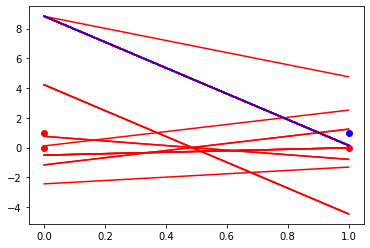

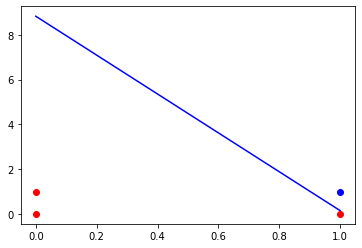

| input  |output|
| [0, 0] | -1.0 |
| [0, 1] | -1.0 |
| [1, 0] | -1.0 |
| [1, 1] | 1.0 |


In [10]:
import numpy as np
import matplotlib.pyplot as plt

#AND gate
X=[[0,0],[0,1],[1,0],[1,1]] # 4 input training vectors 
T=[-1,-1,-1,1] # targets [-1,1]

global w
w = np.random.randn(3)
# plot red and blue points for AND gate input
for i in range(len(X)): 
  x = X[i]
  if T[i]== -1:
    plt.plot(x[0],x[1],'ro')
  else:
    plt.plot(x[0],x[1],'bo')

def activation_func(x):
        yin = np.sign(np.dot(w,np.append(x,1)))
        #yin1 = np.sign(w[2]+w[0]*x[0]+w[1]*x[1])
        if(yin >= 0):
          return 1
        else:
          return -1

def update_Waights(x,t):
        alfa = 1
        wold = w
        wnew = w
        wnew[2] = wold[2] + alfa*t
        wnew[0] = wold[0] + alfa*x[0]*t
        wnew[1] = wold[1] + alfa*x[1]*t
        return wnew

        

def draw_boundry(color):
        ## add code here to plot boundry
        #Equation of line
        #w1x1 + w2x2 + b = 0
        #x1-intercept 
        #x1 = -(b - w2x2) / w1
        #if x2 == 0
        #x1 = -(b - w2 * 0) / w1
        #x1 = -b / w1
        #####################################
        #X2-intercept
        #x2 = -(b - w1x1) / w2
        #if x1 == 0
        #x2 = -(b - w1 * 0) / w2
        #x2 = -b / w2
        #####################################
        #here y = x2
        #Slope m
        #point_1 = (0, -b / w2) 
        #point_2 = (-b / w1, 0)
        #m = (y2 - y1) / (x2 - x1)
        #m = (0 - -(b / w2)) / (-(b / w1) - 0)
        #m = -(b / w2) / (b / w1)
        #####################################
        #slope = -(b / w2) / (b / w1)
        #x2-intercept = -b / w2
        x1 = np.linspace(0,1,5)
        x2 = (-(w[2] / w[1]) / (w[2] / w[0]))*x1 + (-w[2] / w[1])
        plt.plot(x1, x2, color)
                
done = False
#epoch       
iter=1
while not(done):
        for x in range(len(X)):
          #print(activation_func(X[x]))
          #print(T[x])
          #print(w)
          draw_boundry('-r')
          if(activation_func(X[x]) != T[x]): 
            w = update_Waights(X[x],T[x])
          else:
            if(iter >= 10):  
              done = True
        iter = iter + 1
  
             
             
        ## add code here to learn the optimal weights to model AND gate functionality using perceptron
draw_boundry('-b')
plt.show()         
#Trained boudry        
draw_boundry('-b')
# plot red and blue points for AND gate input
for i in range(len(X)): 
  x = X[i]
  if T[i]== -1:
    plt.plot(x[0],x[1],'ro')
  else:
    plt.plot(x[0],x[1],'bo')
plt.show()       
print("| input  |output|")
for x in range(len(X)):
    output = np.sign(np.dot(w,np.append(X[x],1)))
    print("| {} | {} |".format(X[x], output))
